In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def create_dbn():
    # Define nodes for two time slices
    nodes_t1 = ['X_t1', 'Y_t1']
    nodes_t2 = ['X_t2', 'Y_t2']
    
    # Create the graph
    G = nx.DiGraph()
    
    # Add nodes
    G.add_nodes_from(nodes_t1 + nodes_t2)
    
    # Intra-slice dependencies (within the same time slice)
    G.add_edge('X_t1', 'Y_t1')
    G.add_edge('X_t2', 'Y_t2')
    
    # Inter-slice dependencies (across consecutive time slices)
    G.add_edge('X_t1', 'X_t2')
    G.add_edge('Y_t1', 'Y_t2')
    #G.add_edge('X_t1', 'Y_t2')
    G.add_edge('Y_t1', 'X_t2')
    
    return G, nodes_t1, nodes_t2

In [3]:
def create_adjacency_matrix(G, nodes_t1, nodes_t2):
    # Combined nodes list
    nodes = nodes_t1 + nodes_t2
    
    # Create adjacency matrix
    adj_matrix = nx.adjacency_matrix(G, nodelist=nodes).todense()
    
    return np.array(adj_matrix), nodes

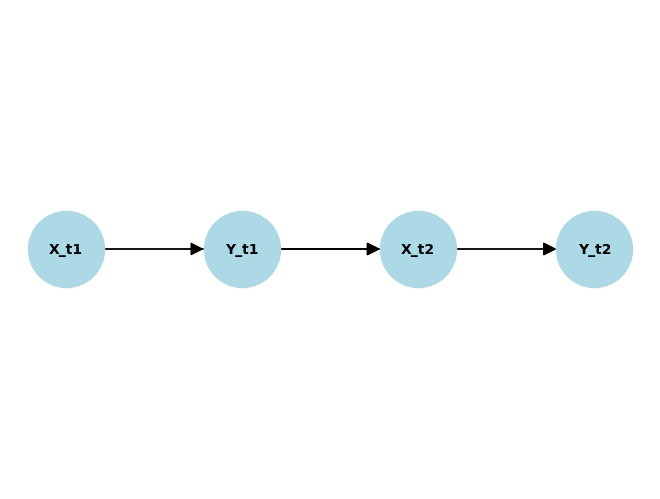

Adjacency Matrix:
[[0 1 1 0]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 0]]


In [7]:
def plot_dbn(G):
    pos = {
        'X_t1': (0, 1), 'Y_t1': (1, 1),
        'X_t2': (2, 1), 'Y_t2': (3, 1)
    }
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
    plt.show()

# Create the DBN and plot it
G, nodes_t1, nodes_t2 = create_dbn()
plot_dbn(G)

# Create the adjacency matrix
adj_matrix, nodes = create_adjacency_matrix(G, nodes_t1, nodes_t2)
print("Adjacency Matrix:")
print(adj_matrix)

In [1]:
import pandas as pd
import numpy as np

def generate_noisy_time_series(num_segments, segment_length, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    num_timesteps = num_segments * segment_length

    # Initialize the DataFrame
    data = pd.DataFrame({
        'X': np.zeros(num_timesteps),
        'Y': np.zeros(num_timesteps),
        'Z': np.zeros(num_timesteps)
    })

    # Function to add noise
    def add_noise(value):
        noise = np.random.normal(0, 0.5 * np.abs(value))
        return value + noise

    # Generate data in segments
    for segment in range(num_segments):
        start_idx = segment * segment_length
        
        # Initialize the first two values for X and Y, and the first value for Z in each segment
        data.loc[start_idx, 'X'] = np.random.randn()
        data.loc[start_idx + 1, 'X'] = np.random.randn()
        data.loc[start_idx, 'Y'] = np.random.randn()
        data.loc[start_idx + 1, 'Y'] = np.random.randn()
        data.loc[start_idx, 'Z'] = np.random.randn()

        for t in range((start_idx + (segment_length-1)), start_idx + segment_length):
            X_t = 0.5 * data.loc[t-1, 'X'] + 0.3 * data.loc[t-2, 'X']
            Y_t = 0.3 * data.loc[t-1, 'Y'] + 0.2 * data.loc[t-2, 'Y']
            Z_t = 0.5 * X_t + 0.8 * Y_t
            
            # Add noise to each variable
            data.loc[t, 'X'] = add_noise(X_t)
            data.loc[t, 'Y'] = add_noise(Y_t)
            data.loc[t, 'Z'] = add_noise(Z_t)

    return data


num_segments = 100
segment_length = 3

# Generate the noisy time series
noisy_time_series_data = generate_noisy_time_series(num_segments, segment_length, seed=42)

# Display the first few rows
print(noisy_time_series_data)

            X         Y         Z
0    0.496714  0.647689 -0.234153
1   -0.138264  1.523030  0.000000
2    0.061179  1.512571  0.899798
3   -0.469474 -0.463418  0.241962
4    0.542560 -0.465730  0.000000
..        ...       ...       ...
295  1.080781  0.459180  0.000000
296 -0.468177  0.435374  0.721949
297  0.271579 -1.081057 -0.039555
298 -1.276749  1.053153  0.000000
299 -0.177372  0.102559 -0.192751

[300 rows x 3 columns]


In [2]:
save_path = '../data/time_series.csv'
noisy_time_series_data.to_csv(save_path)

In [3]:
X_list = []
Y_list = []
Z_list = []
for i in range(2, len(noisy_time_series_data)):
    X_test = noisy_time_series_data.loc[i, 'X'] - (0.2*noisy_time_series_data.loc[i-1, 'X'] + 0.3*noisy_time_series_data.loc[i-2, 'X'])
    Y_test = noisy_time_series_data.loc[i, 'Y'] - (0.2*noisy_time_series_data.loc[i-1, 'Y'] + 0.3*noisy_time_series_data.loc[i-2, 'Y'])
    Z_test = noisy_time_series_data.loc[i, 'Z'] - (0.4*noisy_time_series_data.loc[i-1, 'Z'] + 0.3*noisy_time_series_data.loc[i, 'X'] + 0.2*noisy_time_series_data.loc[i, 'Y'])
    X_list.append(X_test)
    Y_list.append(Y_test)
    Z_list.append(Z_test)
    

In [9]:
import numpy as np

# Example matrix
lambda_a = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])

# Convert to upper triangular matrix
upper_triangular = np.triu(lambda_a, k=1)

print("Original matrix:")
print(lambda_a)
print("Upper triangular matrix:")
print(upper_triangular)

Original matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Upper triangular matrix:
[[0 2 3]
 [0 0 6]
 [0 0 0]]
